# Titanic Machine Learning

### 2nd version with more accurate feature engineering
[Source](https://www.kaggle.com/c/titanic)

In my first version, I used index_col = 0 when using read_csv which made PassengerId into the index column, which is something I should have avoided doing

In [387]:
# The code was removed by DSX for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [388]:
# Machine Learning Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

In [389]:
df_test = pd.read_csv(get_object_storage_file_with_credentials_cb005406ee1149a2b0dc70050eb302d1('DefaultProjectminholeecaibmcom', 'titanic_test.csv'),
                      header=0, dtype={'Age': np.float64})
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [390]:
#Combining both training and test dataset
full_data = [df_data , df_test]

In [391]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

#Allow chained assignment
pd.options.mode.chained_assignment = None

#Configure
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
plt.rcParams[ 'figure.figsize' ] = 8 , 6

In [392]:
print df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


In [393]:
#Make sure to double square bracket if passing more than one feature
df_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [394]:
df_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [395]:
#Checking out if there is a correlation between family size and survival rate
for data in full_data:
    data['FamSize'] = data['SibSp'] + data['Parch'] + 1
print df_data[['FamSize','Survived']].groupby(['FamSize'], as_index=False).mean()

   FamSize  Survived
0        1  0.303538
1        2  0.552795
2        3  0.578431
3        4  0.724138
4        5  0.200000
5        6  0.136364
6        7  0.333333
7        8  0.000000
8       11  0.000000


In [396]:
for data in full_data:
    data['FamSize<=4'] = (data['FamSize'] <= 4).astype(int)

print df_data[['FamSize<=4' , 'Survived']].groupby(['FamSize<=4'], as_index=False).mean()

   FamSize<=4  Survived
0           0  0.161290
1           1  0.400483


In [397]:
for i in range(2):
    full_data[i]['Alone'] = (full_data[i]['FamSize']==1).astype(int)

df_data['Alone'] = (df_data['FamSize']==1).astype(int)

df_data.head()
#df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,FamSize<=4,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1,1


In [398]:
print df_data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

   Alone  Survived
0      0  0.505650
1      1  0.303538


In [399]:
print df_data['Embarked'].value_counts()
print df_data['Embarked'].isnull().sum()
#Since there are only 2 null cells, we will fill it in with the majority which is 'S' for Southampton
df_data['Embarked'].fillna('S', inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64
2


In [400]:
print df_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [401]:
#We will use median for Fare, because mean is misleading due to extremely high cost tickets
df_data['Fare'].fillna(df_data['Fare'].median(), inplace=True)
df_data['CategoryFare'] = pd.qcut(df_data['Fare'], 5)
print (df_data[['CategoryFare', 'Survived']].groupby(['CategoryFare'], as_index=False).mean())

df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

        CategoryFare  Survived
0         [0, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.679]  0.424419
3   (21.679, 39.688]  0.444444
4  (39.688, 512.329]  0.642045


In [402]:
df_copy = df_data.copy()
list_copy = [df_copy]
def is_float(number):
    try:
        float(number)
        return 1
    except ValueError:
        return 0

for data in list_copy:
    data['sample'] = data['Ticket'].apply(is_float)
    
print df_copy[['sample', 'Survived']].groupby(['sample'], as_index=False).mean()



   sample  Survived
0       0  0.382609
1       1  0.384266


In [403]:
#Will attempt to make sense of Ticket(if there is any correlation)
def delete_chars(ticket):
    found = ticket.find(' ')
    if found != -1:
        return ticket[found+1:]
    return ticket

def get_ticket(ticket):
    ticket = ticket.replace("." , "")
    ticket = ticket.replace("/" , "")
    ticket_search = re.search('[a-zA-Z]+', ticket)
    if ticket_search:
        #print 'ticket:', ticket, ' | ticket_search:', ticket_search.group(0)
        return ticket_search.group(0).lower()
    return "X"
    
for data in full_data:
    #data['Ticket'] = data['Ticket'].apply(delete_chars)
    data['TicketCategory'] = data['Ticket'].apply(get_ticket)
    #data['Ticket'].
    #data['TicketCategory'] = data['TicketCategory'].astype(float)
df_data[['TicketCategory', 'Survived']].groupby(['TicketCategory'], as_index=False).mean()

#df_data.head()

,TicketCategory,Survived
0,X,0.384266
1,a,0.071429
2,as,0.000000
3,c,0.400000
4,ca,0.341463
5,casoton,0.000000
6,fa,0.000000
7,fc,0.000000
8,fcc,0.800000
9,line,0.250000


In [404]:
equiv = {'X': 0, 'pc':1, 'ca':2,'a':3,'stono':4,'sotonoq':5,'scparis':6,'wc':7,'soc':8,
'c':9,'fcc':10,'line':11,'sopp':12,'wep':13,'pp':14,'scah':15,'sotono':16,'ppp':17,'swpp':18,
'fc':19,'scow':20,'fa':21,'casoton':22,'as':23,'sop':24,'sca':25,'sp':26,'sc':27,'lp':28,'aq':29,'stonoq':30}

#for data in full_data:
#    data['TicketCategory'] = data['TicketCategory'].map(equiv).astype(int)
df_data['TicketCategory'] = df_data.TicketCategory.map(equiv)
df_test['TicketCategory'] = df_test.TicketCategory.map(equiv)
#print df_test['TicketCategory'].isnull().sum()
#print df_data['TicketCategory'].isnull().sum()   

#df_data[['TicketCategory', 'Survived']].groupby(['TicketCategory'], as_index=False).mean()

In [405]:
print "TRAIN"
#for i in range(len(df_data.TicketCategory.values)):
    #if df_data.TicketCategory.iloc[i] == '':
    #    print "i:", i

print "TEST"
#for i in range(len(df_test.TicketCategory.values)):
    #if df_test.TicketCategory.iloc[i] == '':
    #    print "i:", i

#df_data.TicketCategory.value_counts()

TRAIN
TEST


In [406]:
df_copy.Ticket.iloc[302]

'LINE'

In [407]:
#Since there are a huge number of age missing, we will use random number generated using mean and std.
for data in full_data:
    age_mean = data['Age'].mean()
    age_std = data['Age'].std()
    age_null = data['Age'].isnull().sum()

    age_random = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_null)

    data['Age'][np.isnan(data['Age'])] = age_random.astype(int)
    
df_data['CategoryAge'] = pd.cut(data['Age'], 5)

print (df_data[['CategoryAge', 'Survived']].groupby(['CategoryAge'], as_index=False).mean())

        CategoryAge  Survived
0  (0.0942, 15.336]  0.281250
1  (15.336, 30.502]  0.416290
2  (30.502, 45.668]  0.371681
3  (45.668, 60.834]  0.357143
4      (60.834, 76]  0.500000


In [408]:
#Will see if name has an impact on the outcome
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [409]:
for data in full_data:
    data['Title'] = data['Name'].apply(get_title)
    
print pd.crosstab(df_data['Title'], df_data['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [410]:
#We will put people's titles into meaningful categories
for data in full_data:
    data['Title'] = data['Title'].replace(to_replace=['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer',
                                                      'Lady', 'Major', 'Rev', 'Sir'], value='Above Average')
    data['Title'].replace(to_replace='Mlle', value='Miss', inplace=True)
    data['Title'].replace('Mme', 'Mrs', inplace=True)
    data['Title'].replace('Ms', 'Miss', inplace=True)

print df_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

           Title  Survived
0  Above Average  0.347826
1         Master  0.575000
2           Miss  0.702703
3             Mr  0.156673
4            Mrs  0.793651


In [411]:
#See if the passengers had a cabin or not
for data in full_data:
    data['hasCabin'] = data['Cabin'].apply(lambda x: 1 if type(x)==str else 0)
    
print df_data[['hasCabin', 'Survived']].groupby(['hasCabin'], as_index=False).mean()

   hasCabin  Survived
0         0  0.299854
1         1  0.666667


In [412]:
#df_copy.drop(['Name', 'SibSp', 'Parch', 'FamSize', 'Ticket', 'Cabin'], axis=1, inplace=True)
#df_copy.head()

In [413]:
df_test.isnull().sum()

#dropping a few features for now
#df_test.drop(['Cabin', 'CategoryAge', 'FamSize','SibSp', 'Parch', 'Ticket', 'Name'], axis=1, inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,FamSize<=4,Alone,TicketCategory,Title,hasCabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,1,0,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,1,0,0,Mrs,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,1,0,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,1,0,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,1,0,0,Mrs,0


In [414]:
#We will be using map() method in order to convert everything into numerical value so that we can get a classifier score
for data in full_data:
    
    #Mapping Embarked
    data['Embarked'] = data['Embarked'].map({'Q': 0, 'S': 1, 'C': 2}).astype(int)
    
    #Mapping Sex
    data['Sex'] = data['Sex'].map({'male': 1, 'female': 0}).astype(int)
    
    #Mapping Age(used cut method)
    data.loc[data['Age'] <= 16 , 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <=32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <=48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <=64), 'Age'] = 3
    data.loc[(data['Age'] > 64), 'Age'] = 4
    
    #Mapping Fare(used qcut method)
    data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] < 14.454) , 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] < 31) , 'Fare'] = 2
    data.loc[(data['Fare'] > 31), 'Fare'] = 3
    
    #Mapping Title to values
    data['Title'] = data['Title'].map({'Above Average': 0, 'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4})
    #There is 1 missing title in df_test dataset
    data['Title'].fillna(0, inplace=True)
    
#print df_data.columns.values
drop_features = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamSize']
df_data.drop(drop_features, axis=1, inplace=True)
df_data.drop(['CategoryFare', 'CategoryAge'], axis=1, inplace=True)
df_test.drop(drop_features, axis=1, inplace=True)

print df_data.head(10)
print '\n', df_test.isnull().sum()

   PassengerId  Survived  Pclass  Sex  Age  Fare  Embarked  FamSize<=4  Alone  \
0            1         0       3    1    1     0         1           1      0   
1            2         1       1    0    2     3         2           1      0   
2            3         1       3    0    1     1         1           1      1   
3            4         1       1    0    2     3         1           1      0   
4            5         0       3    1    2     1         1           1      1   
5            6         0       3    1    2     1         0           1      1   
6            7         0       1    1    3     3         1           1      1   
7            8         0       3    1    0     2         1           0      0   
8            9         1       3    0    1     1         1           1      0   
9           10         1       2    0    0     2         2           1      0   

   TicketCategory  Title  hasCabin  
0               3      1         0  
1               1      2         1

In [415]:
df_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
FamSize<=4        0
Alone             0
TicketCategory    0
Title             0
hasCabin          0
dtype: int64

In [416]:
features = ['Pclass', 'Sex', 'Age', 'Alone', 'Fare', 'Embarked', 'Title', 'hasCabin', 'TicketCategory'] 
X_train = df_data[features]
Y_train = df_data['Survived']
X_test = df_test[features]

from sklearn.ensemble import RandomForestClassifier
  
cl = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)

cl.fit(X_train, Y_train)
Y_pred = cl.predict(X_test)

#testing2 = DecisionTreeClassifier()
#testing2.fit(X_train, Y_train)
#Y_pred = testing2.predict(X_test)
#testing1 = GradientBoostingClassifier()
#testing1.fit(X_train, Y_train)
#Y_pred = testing1.predict(X_test)

RandomForestClassifier: 0.798206278027


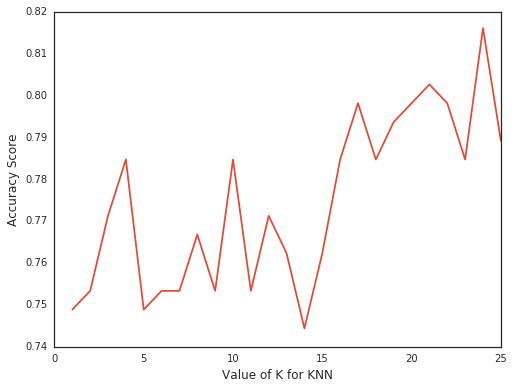

In [417]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train)

c2 = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=4)
c2.fit(x_train,y_train)
print 'RandomForestClassifier:', metrics.accuracy_score(c2.predict(x_test), y_test)

k_range = range(1,26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    k_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(k_pred, y_test))
    
#Visualize by plotting
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel("Accuracy Score")
#k=5 seems like it's best

In [418]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
aassd = knn.predict(x_test)
print metrics.accuracy_score(aassd, y_test)

0.748878923767


In [419]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
fdsa = svc.predict(x_test)
print metrics.accuracy_score(fdsa, y_test)

grad = GradientBoostingClassifier()
grad.fit(x_train, y_train)
qwer = grad.predict(x_test)
print metrics.accuracy_score(qwer, y_test)


0.820627802691
0.838565022422


In [420]:
def put_file(credentials, local_file_name):  
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""
    f = open(local_file_name,'r')
    my_data = f.read()
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', credentials['container'], '/', local_file_name])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = my_data )
    print resp2

In [421]:
# The code was removed by DSX for sharing.

In [422]:
PId = range(892,1310)
ans = pd.DataFrame({'PassengerId':PId, 'Survived':Y_pred})
print ans.head()
ans.to_csv('minho_ans.csv', index=False)
put_file(credentials_1, 'minho_ans.csv')
print 'Done!'

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
<Response [201]>
Done!
